Memoona Shah

0001056334

Deep learning Project Work

#Stock Sentiment Analysis using News Headlines with deep learning

The aim of this project is to perform sentiment analysis on stock market news to classify them into sentiment categories. News headlines can have a significant impact on stock prices as they can influence the sentiment and expectations of investors, which in turn can drive demand for, or affect the perceived value of, a particular stock. In this project, deep learning models will be used to analyze and classify the sentiment of financial news articles headlines. The selected data will be pre-processed, and a word embedding model such as word2vec or GloVe will be used to convert the text into numerical representations. Then, the data will be fed into deep learning models such as Recurrent Neural Network (RNN) to perform sentiment analysis and predict stock price movements.




The main task is to detect the tone of the financial text i.e, positive,negative or neutral using Deep Learning approaches.

# Dataset description

The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one easy-to-use CSV file. It provides financial sentences with sentiment labels.



# Methodology

The methodology of the project is going to includes the following

              1. Data preprocessing:

Data preprocessing includes the following tasks:
- Lower Casing
- Special characters removal
- Removing punctuations
- Removing stopwords
- tokenization
- vectorization
-  train test splitting of data for model training.

              2. Models:

the models that are going to be used to train the data are:
 - Basic LSTM
 - Basic GRU
 - Glove + LSTM
 - Glove + GRU
 

## Data preprocessing

In [6]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [7]:
pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install backports.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import re
import cv2
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
from matplotlib import cm
import text_hammer as th
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

In [10]:
df = pd.read_csv('data.csv')

In [11]:
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


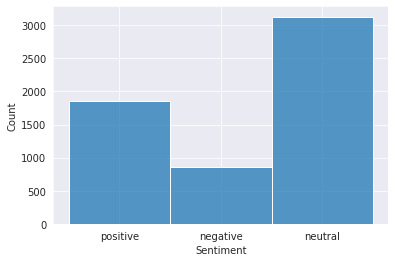

In [12]:
import seaborn as sns
sns.set_style('darkgrid')
sns.histplot(x='Sentiment',data=df)
plt.show()

In [13]:
for i in range(3):
  print(str(df['Sentence'][i])+"----->"+str(len(str(df['Sentence'][i]).split(' '))))


The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .----->32
$ESI on lows, down $1.50 to $2.50 BK a real possibility----->11
For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .----->39


**Creating an additional column containing the number of words in each respective sentence**



In [14]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['Sentence']))
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23


**converting categorical sentiment column to numerical**

In [15]:
mapdf = {'positive':0,'negative':1,'neutral':2}
df['Sentiment'] = list(map(lambda x:mapdf[x],df['Sentiment']))
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,0,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1,11
2,"For the last quarter of 2010 , Componenta 's n...",0,39
3,According to the Finnish-Russian Chamber of Co...,2,20
4,The Swedish buyout firm has sold its remaining...,2,23


In [16]:
print(df['Sentiment'].corr(df['len']))

0.10137114484667775


In [17]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [19]:
sentences = df['Sentence'].copy()[:]
sentences = sentences.to_list()
sentences = list(map(lambda x: x.lower(),sentences))
#sentences = list(map(lambda x: th.cont_exp(x),sentences)) #you're -> you are; i'm -> i am
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_html_tags(x),sentences))
sentences = list(map(lambda x: th.remove_stopwords(x),sentences))
sentences = list(map(lambda x: th.remove_special_chars(x),sentences))
sentences = list(map(lambda x: th.remove_accented_chars(x),sentences))
sentences = list(map(lambda x: th.make_base(x),sentences))


In [20]:
sentences = list(map(lambda x: re.sub("(.)\\1{2,}", "\\1", x),sentences))

In [21]:
#sentences = list(map(lambda x: th.spelling_correction(x),sentences))

In [22]:
#sentences = list(map(lambda x: str(x),sentences))

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [27]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
sentences_1 = list(map(lambda x: lemmatize_text(x),sentences))

In [28]:
sentences[:3]

['geosolution technology leverage benefon gps solution provide location base search technology community platform location relevant multimedia content new powerful commercial model',
 'esi low 150 250 bk real possibility',
 'quarter 2010 componenta net sale double eur131 m eur76 m period year early move zero pretax profit pretax loss eur7 m']

In [29]:
sentences_1[:3]

[['geosolution',
  'technology',
  'leverage',
  'benefon',
  'gps',
  'solution',
  'provide',
  'location',
  'base',
  'search',
  'technology',
  'community',
  'platform',
  'location',
  'relevant',
  'multimedia',
  'content',
  'new',
  'powerful',
  'commercial',
  'model'],
 ['esi', 'low', '150', '250', 'bk', 'real', 'possibility'],
 ['quarter',
  '2010',
  'componenta',
  'net',
  'sale',
  'double',
  'eur131',
  'm',
  'eur76',
  'm',
  'period',
  'year',
  'early',
  'move',
  'zero',
  'pretax',
  'profit',
  'pretax',
  'loss',
  'eur7',
  'm']]

In [30]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [31]:
import nltk
nltk.download('punkt')
pairs = []
for sent in tqdm(sentences):
    pairs.extend(nltk.word_tokenize(sent))
freq = nltk.FreqDist(pairs)
freq.most_common(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/5842 [00:00<?, ?it/s]

[('eur', 1284),
 ('company', 917),
 ('mn', 729),
 ('sale', 604),
 ('profit', 584),
 ('say', 574),
 ('finnish', 527),
 ('share', 511),
 ('net', 499),
 ('million', 493)]

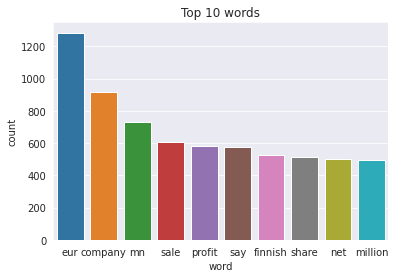

In [32]:
tempdf = pd.DataFrame(freq.most_common(10),  columns=['word', 'count'])
sns.barplot(x='word',y='count',data=tempdf)
plt.title("Top 10 words")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#from keras.utils.all_utils import to_categorical
y = to_categorical(df['Sentiment'])
x = sentences.copy()
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

## Vectorization

In [34]:
from keras.preprocessing.text import Tokenizer
num_words = 12000 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([pd.Series(X_train), pd.Series(X_test)], axis = 0)
tokenizer.fit_on_texts(df_total)

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=81,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 81, padding = 'post')

In [36]:
print(X_train_pad.shape,X_test_pad.shape)

(4089, 81) (1753, 81)


## LSTM

In [37]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout

In [38]:
lstm = Sequential()
lstm.add(Embedding(input_dim = num_words,
                          output_dim = 100,
                          input_length= X_train_pad.shape[1]))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(256,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=False)))
lstm.add(Dense(64,activation='tanh'))
lstm.add(Dense(32,activation='tanh'))
lstm.add(Dense(10,activation='tanh'))
lstm.add(Dense(3,activation='softmax'))

In [39]:
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 81, 100)           1200000   
                                                                 
 dropout (Dropout)           (None, 81, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 81, 256)          234496    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 81, 512)          1050624   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 81, 512)           0

In [41]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [42]:
lstm_history = lstm.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.9505 - accuracy: 0.5652
Epoch 1: val_accuracy improved from -inf to 0.66115, saving model to ./model.h5
64/64 [==============================] - 32s 241ms/step - loss: 0.9505 - accuracy: 0.5652 - val_loss: 0.8206 - val_accuracy: 0.6612
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.5661 - accuracy: 0.7743
Epoch 2: val_accuracy improved from 0.66115 to 0.67998, saving model to ./model.h5
64/64 [==============================] - 8s 124ms/step - loss: 0.5661 - accuracy: 0.7743 - val_loss: 0.7534 - val_accuracy: 0.6800
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.3445 - accuracy: 0.8635
Epoch 3: val_accuracy did not improve from 0.67998
64/64 [==============================] - 7s 103ms/step - loss: 0.3445 - accuracy: 0.8635 - val_loss: 0.8269 - val_accuracy: 0.6554
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.8944
Epoch 4: val_acc

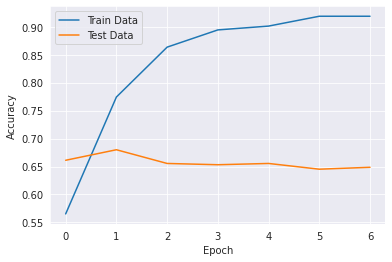

In [43]:
plt.plot(lstm_history.history['accuracy'], label='Train Data')
plt.plot(lstm_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

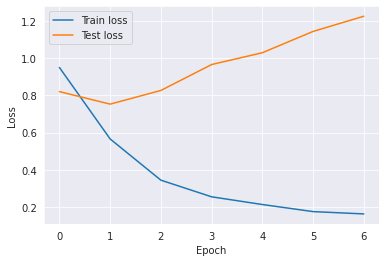

In [44]:
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.metrics import classification_report
predictions = lstm.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 3s 13ms/step
              precision    recall  f1-score   support

    positive       0.72      0.60      0.65       556
    negative       0.29      0.19      0.23       258
     neutral       0.68      0.81      0.74       939

    accuracy                           0.65      1753
   macro avg       0.56      0.53      0.54      1753
weighted avg       0.63      0.65      0.63      1753



In [46]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## Glove+LSTM

In [47]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300')

[=================================================-] 99.2% 372.9/376.1MB downloaded


In [48]:
glove_gensim.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.6713277101516724)]

In [49]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero 
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10855 [00:00<?, ?it/s]

In [50]:
gensim_weight_matrix.shape

(12000, 300)

In [51]:
glove = Sequential()
glove.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(256,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=False)))
glove.add(Dense(64,activation='tanh'))
glove.add(Dense(32,activation='tanh'))
glove.add(Dense(10,activation='tanh'))
glove.add(Dense(3,activation='softmax'))

In [52]:
glove.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_3 (Dropout)         (None, 81, 300)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 81, 256)          439296    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 81, 512)          1050624   
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 81, 512)          

In [53]:
glove.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
glove_history = glove.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.8660 - accuracy: 0.6063
Epoch 1: val_accuracy did not improve from 0.67998
64/64 [==============================] - 17s 84ms/step - loss: 0.8660 - accuracy: 0.6063 - val_loss: 0.7790 - val_accuracy: 0.6497
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.7172 - accuracy: 0.6850
Epoch 2: val_accuracy did not improve from 0.67998
64/64 [==============================] - 5s 74ms/step - loss: 0.7172 - accuracy: 0.6850 - val_loss: 0.7563 - val_accuracy: 0.6634
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.7229
Epoch 3: val_accuracy improved from 0.67998 to 0.68682, saving model to ./model.h5
64/64 [==============================] - 6s 94ms/step - loss: 0.6297 - accuracy: 0.7229 - val_loss: 0.7271 - val_accuracy: 0.6868
Epoch 4/10
63/64 [============================>.] - ETA: 0s - loss: 0.6121 - accuracy: 0.7391
Epoch 4: val_accuracy improved from 0.68682 to 0

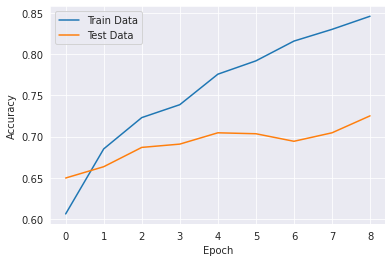

In [55]:
plt.plot(glove_history.history['accuracy'], label='Train Data')
plt.plot(glove_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.98, 1])
plt.legend(loc='best')
plt.show()

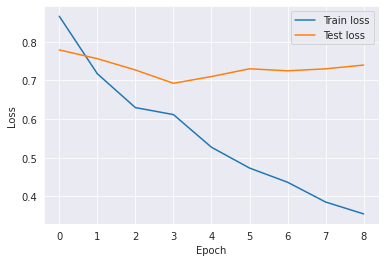

In [56]:
plt.plot(glove_history.history['loss'], label='Train loss')
plt.plot(glove_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [57]:
predictions = glove.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

    positive       0.71      0.74      0.72       556
    negative       0.52      0.20      0.29       258
     neutral       0.75      0.86      0.80       939

    accuracy                           0.73      1753
   macro avg       0.66      0.60      0.61      1753
weighted avg       0.70      0.73      0.70      1753



In [58]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## Glove+GRU

In [59]:
from keras.layers import GRU
gru = Sequential()
gru.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(256,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=False)))
gru.add(Dense(64,activation='tanh'))
gru.add(Dense(32,activation='tanh'))
gru.add(Dense(10,activation='tanh'))
gru.add(Dense(3,activation='softmax'))

In [60]:
gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_6 (Dropout)         (None, 81, 300)           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 81, 256)          330240    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 81, 512)          789504    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 81, 512)          

In [61]:
gru.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
gru_history = gru.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.6009
Epoch 1: val_accuracy did not improve from 0.72504
64/64 [==============================] - 17s 74ms/step - loss: 0.8921 - accuracy: 0.6009 - val_loss: 0.8091 - val_accuracy: 0.6612
Epoch 2/10
63/64 [============================>.] - ETA: 0s - loss: 0.7472 - accuracy: 0.6868
Epoch 2: val_accuracy did not improve from 0.72504
64/64 [==============================] - 3s 46ms/step - loss: 0.7488 - accuracy: 0.6850 - val_loss: 0.7291 - val_accuracy: 0.6988
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.7122
Epoch 3: val_accuracy did not improve from 0.72504
64/64 [==============================] - 3s 50ms/step - loss: 0.6738 - accuracy: 0.7122 - val_loss: 0.7049 - val_accuracy: 0.6925
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.6300 - accuracy: 0.7327
Epoch 4: val_accuracy did not improve from 0.72504
64/64 [======================

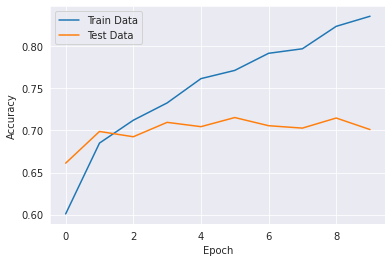

In [63]:
plt.plot(gru_history.history['accuracy'], label='Train Data')
plt.plot(gru_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.7, 1])
plt.legend(loc='best')
plt.show()

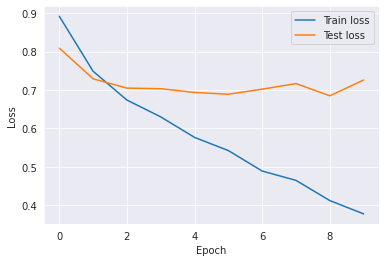

In [64]:
plt.plot(gru_history.history['loss'], label='Train loss')
plt.plot(gru_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [65]:
predictions = gru.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 3s 12ms/step
              precision    recall  f1-score   support

    positive       0.71      0.72      0.72       556
    negative       0.41      0.31      0.35       258
     neutral       0.75      0.80      0.77       939

    accuracy                           0.70      1753
   macro avg       0.63      0.61      0.61      1753
weighted avg       0.69      0.70      0.69      1753



In [66]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## Fasttext+LSTM

In [67]:
import gensim.downloader as api
glove_gensim  = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [68]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero 
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10855 [00:00<?, ?it/s]

In [69]:
ftext = Sequential()
ftext.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(256,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=False)))
ftext.add(Dense(64,activation='tanh'))
ftext.add(Dense(32,activation='tanh'))
ftext.add(Dense(10,activation='tanh'))
ftext.add(Dense(3,activation='softmax'))

In [70]:
ftext.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_9 (Dropout)         (None, 81, 300)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 81, 256)          439296    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 81, 256)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 81, 512)          1050624   
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 81, 512)          

In [71]:
ftext.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
ftext_history = ftext.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
63/64 [============================>.] - ETA: 0s - loss: 0.9443 - accuracy: 0.5523
Epoch 1: val_accuracy did not improve from 0.72504
64/64 [==============================] - 17s 81ms/step - loss: 0.9428 - accuracy: 0.5529 - val_loss: 0.9016 - val_accuracy: 0.5853
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.8585 - accuracy: 0.6141
Epoch 2: val_accuracy did not improve from 0.72504
64/64 [==============================] - 3s 51ms/step - loss: 0.8585 - accuracy: 0.6141 - val_loss: 0.8389 - val_accuracy: 0.6246
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.7818 - accuracy: 0.6539
Epoch 3: val_accuracy did not improve from 0.72504
64/64 [==============================] - 3s 50ms/step - loss: 0.7818 - accuracy: 0.6539 - val_loss: 0.7917 - val_accuracy: 0.6497
Epoch 4/10
63/64 [============================>.] - ETA: 0s - loss: 0.7391 - accuracy: 0.6801
Epoch 4: val_accuracy did not improve from 0.72504
64/64 [======================

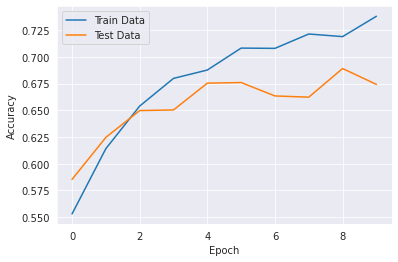

In [73]:
plt.plot(ftext_history.history['accuracy'], label='Train Data')
plt.plot(ftext_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

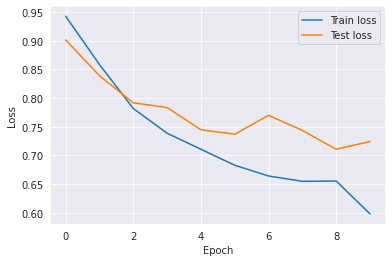

In [74]:
plt.plot(ftext_history.history['loss'], label='Train loss')
plt.plot(ftext_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [75]:
predictions = ftext.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 3s 14ms/step
              precision    recall  f1-score   support

    positive       0.66      0.67      0.66       556
    negative       0.44      0.41      0.42       258
     neutral       0.74      0.75      0.75       939

    accuracy                           0.67      1753
   macro avg       0.61      0.61      0.61      1753
weighted avg       0.67      0.67      0.67      1753



## Results

|S.No|Vector Embedding|Reccurent layer|Accuracy|
|--|--|--|--|
|1|None|LSTM|65%|
|2|Glove|LSTM|73%|
|3|Glove|GRU|70%|
|4|FastText|LSTM|67%|

# Conclusion

The main goal of the work is to produce a model that is capable of identifying the tone of financial news.This is acheived using RNN models such as LSTM and GRU using various embeddings .It is to be noted that the dataset is not capable enough to identify tone perfectly as classes are imbalanced and best accuracy is produced by GLove+LSTM model which is 73%.

The real life application of this work can be useful in various approaches such as automation of financial analysis, extracting profits and loses easily and many more.This work is a beginner step in building more complicated approaches.

The link to download the dataset: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis


 Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2013): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology. (in Press)
